### K-NN 장단점

1. 거듭제곱 크기는? ?주로 유클리디안 거리. 매개변수 기본값 p=2
2. 파이썬에선 minkowski 거리가 기본 값
3. 쉽고 성능이 좋지만, train set이 많을 수록 느림
4. 특성이 수백개면 잘 안 먹힘
> 3,4 => 다른 거 하기전에 일단 한 번 해보는 모델

# Kneighbors Classifier
180326

In [52]:
# !pip install mglearn

In [53]:
from sklearn.datasets import load_iris
iris_dataset= load_iris()

In [54]:
print("{}".format(iris_dataset.keys()))

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


#### 데이터셋에 대한 설명. data['DESCR']
4가지 속성값이 있더라. 키값이 4개

In [55]:
print(iris_dataset['DESCR'][:193]+'\n')

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att



##### 붓꽃 품종

In [56]:
print('{}'.format(iris_dataset['target_names']))

['setosa' 'versicolor' 'virginica']


In [57]:
# print('{}'.format(iris_dataset['']))

In [58]:
print('{}'.format(iris_dataset['data'][:5]))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [59]:
# 012 순서대로 정렬되어 있다
print('{}'.format(iris_dataset['target']))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### 기본 셋: train 75%, test 25%
올 ㅋ
- train_test_split(): train, test 를 명령어 한 줄로 나누어줌
    - 'data': train, 'target': test
    - random_state= 0 random세트 중에 특정 하나. 0번. 다른거 하고싶으면 다른숫자로 고정
    - random_state 안 쓰면 매 실행마다 세트가 달라짐

In [60]:
from sklearn.model_selection import train_test_split
import pandas as pd

import mglearn

import matplotlib.pyplot as plt

In [61]:
X_train, X_test, y_train, y_test= train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state= 0)

y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [62]:
X_train, X_test, y_train, y_test= train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state= 1)

y_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [63]:
X_train, X_test, y_train, y_test= train_test_split(
    iris_dataset['data'], iris_dataset['target'])#, random_state= 0)

y_test

array([2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2, 0, 1, 2,
       0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 0, 2, 2, 0, 2])

In [64]:
iris_dataframe= pd.DataFrame(X_train, columns= iris_dataset.feature_names)

- mglearn, matplotlib 필요
- s: 점의 크기
- cmap: 미리 정의되어있는 색분류로 표현하겠다

In [65]:
fig.clear('all')
fig, axis= plt.subplots(1)
fig.set_size_inches(10,10)

In [66]:
pd.plotting.scatter_matrix(iris_dataframe, c= y_train, figsize= (15,15), marker='o', ax= axis, 
                          hist_kwds= {'bins':20}, s= 60, alpha= .8, cmap= mglearn.cm3)

C:\Users\kitcoop\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000192E3630>,
      dtype=object)

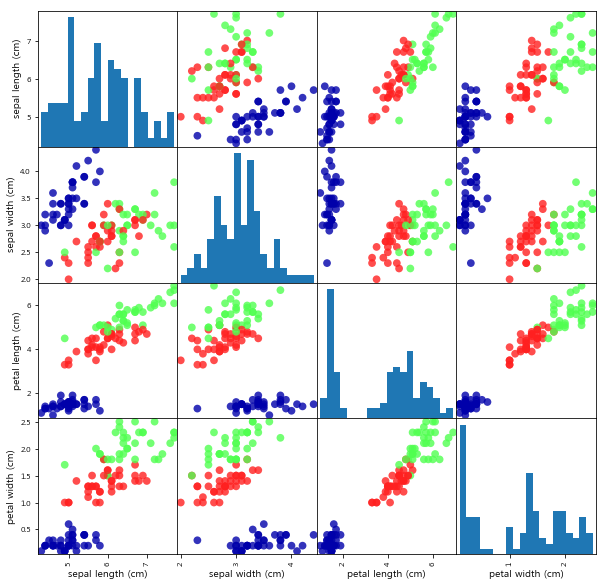

In [67]:
fig

# K-NN 알고리즘
기존 그룹에서 가장 가까운 데이터를 참고하여, 새로 들어온 데이터를 그룹지음

## KNeighbors  Classifier

### k= 1
n_neighbors= 1

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors= 1)

In [69]:
import numpy as np

In [70]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### fit: 훈련 데이터로부터 모델을 만듦

In [71]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [72]:
X_new= np.array([[5, 2.9, 1, 0.2]])
'{}'.format(X_new.shape)

'(1, 4)'

In [73]:
prediction= knn.predict(X_new)

In [74]:
#예측
prediction

array([0])

In [75]:
# 예측한 타깃 이름
iris_dataset['target_names'][prediction]

array(['setosa'], dtype='<U10')

### test 데이터가 과연 괜찮은지, 모델 검증
물론, 기존 있는 거에서 쪼갠 X_test로 검증하는 게, 바람직하진 않음
- 되도록 아주 이질적인 데이터로!
- X_test: 기존에 미리 따로 빼둔 '알고 있는 데이터'

In [76]:
y_pred= knn.predict(X_test)
y_pred

array([1, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2, 0, 1, 2,
       0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 0, 2, 2, 0, 2])

In [77]:
#테스트 세트의 정확도
'{:.2f}'.format(np.mean(y_pred== y_test))

'0.97'

### 혹은 knn.score 로도 확인가능
인자: (기존 알던 테스트데이터, 방금 만든 예측 데이터)

In [78]:
'{:.2f}'.format(knn.score(X_test, y_test))

'0.97'

## k=1 말고 다른 적절한 k값 구하기?

In [79]:
X_train, X_test, y_train, y_test= train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state= 66) #임의 66번 데이터

knn.fit?
- knn.fit(X, y)
- X: training data
- y: target values

In [80]:
training_accuracy= []
test_accuracy= []
# k= 1~10
neighbors_settings= range(1,11)

In [81]:
# k여럿으로 본 모델 생성
for n_neighbors in neighbors_settings:
    knn= KNeighborsClassifier(n_neighbors= n_neighbors)
    knn.fit(X_train, y_train)
    #훈련세트 정확도
    training_accuracy.append(knn.score(X_train, y_train))
    #일반화 정확도
    test_accuracy.append(knn.score(X_test, y_test))

In [82]:
fig.clear('all')
fig, axis= plt.subplots(1)
plt.rc('font', family='Malgun Gothic')

In [83]:
axis.plot(neighbors_settings, training_accuracy, label= '기존 데이터_훈련 정확도')
axis.plot(neighbors_settings, test_accuracy, label= '새 데이터_test정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()

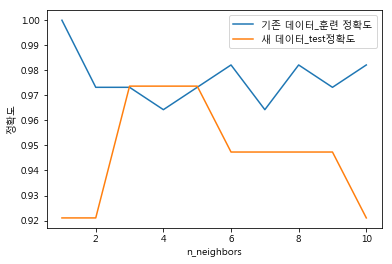

In [84]:
fig

# 유방암 종양. 악성인지?
위스콘신 유방암 데이터 셋

In [85]:
from sklearn.datasets import load_breast_cancer
cancer= load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [86]:
print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [87]:
#유방암 데이터 형태
cancer.data.shape

(569, 30)

### 클래스별 샘플 개수
- dict comprehension {블:라 for 블,라 in zip(블라1, 블라2)}
- benign: 양성
- malignant: 악성

In [88]:
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}

{'benign': 357, 'malignant': 212}

In [89]:
#특성 이름
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### train, test 나누고 score구하고 적절한 k값 구하기

In [90]:
from sklearn.model_selection import train_test_split
import pandas as pd

import mglearn

import matplotlib.pyplot as plt

In [91]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [92]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

#### train, test 로 나눔

In [93]:
X_train, X_test, y_train, y_test= train_test_split(
    cancer['data'], cancer['target'], random_state= 30)
y_test

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

##### 훈련 재료인 기존 값 X_train을 DataFrame으로

In [94]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [95]:
cancer_df_Xt= pd.DataFrame(X_train, columns= cancer.feature_names)

##### 한번 그려봄

In [96]:
fig.clear('all')
fig, axis= plt.subplots(1)
fig.set_size_inches(10,10)

In [97]:
pd.plotting.scatter_matrix(cancer_df_Xt, c= y_train, marker='o', ax=axis, s=60, alpha= .8)

C:\Users\kitcoop\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000019464320>,
      dtype=object)

#### 쉣
너무 많아서 뭐 제대로 뵈지도 않는다

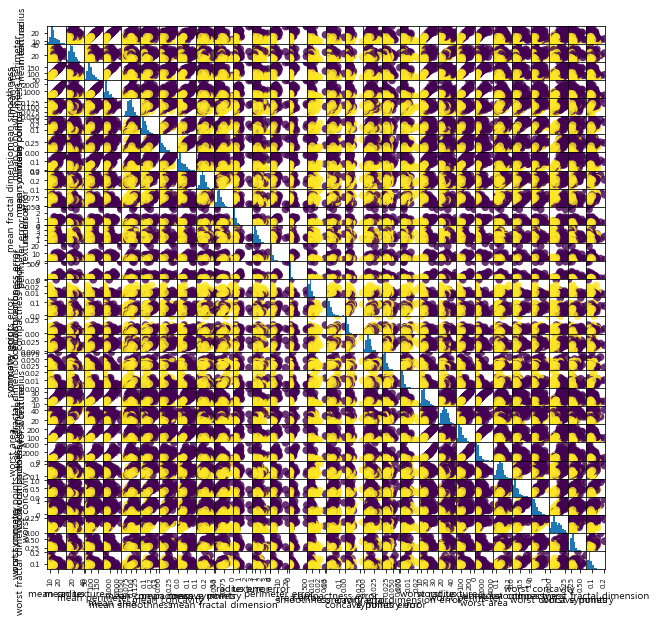

In [98]:
fig

In [99]:
# pd.plotting.scatter_matrix(iris_dataframe, c= y_train, figsize= (15,15), marker='o', ax= axis, 
#                           hist_kwds= {'bins':20}, s= 60, alpha= .8, cmap= mglearn.cm3)

### 이제 진짜 k-NN 알고리즘

#### 일단 k=1 로 보자

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors= 1)

import numpy as np

In [101]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### fit- 기존에 있는거에서 75%분리한 훈련데이터로 예측 모델 만들기

In [102]:
# knn.fit? # y_train: tartget value

In [103]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

##### 방금 만든 완전 임의의 데이터
X_train이랑 닮은거라곤 shape 뿐인

In [104]:
X_train[[1]]

array([[1.422e+01, 2.312e+01, 9.437e+01, 6.099e+02, 1.075e-01, 2.413e-01,
        1.981e-01, 6.618e-02, 2.384e-01, 7.542e-02, 2.860e-01, 2.110e+00,
        2.112e+00, 3.172e+01, 7.970e-03, 1.354e-01, 1.166e-01, 1.666e-02,
        5.113e-02, 1.172e-02, 1.574e+01, 3.718e+01, 1.064e+02, 7.624e+02,
        1.533e-01, 9.327e-01, 8.488e-01, 1.772e-01, 5.166e-01, 1.446e-01]])

In [105]:
X_train[[1]].shape

(1, 30)

In [106]:
X_new= abs(np.array([i/10 for i in np.random.randn(30)])).reshape(1,30)
X_new

array([[0.06281248, 0.03354633, 0.08812358, 0.13746814, 0.09100005,
        0.18923894, 0.04555868, 0.10414309, 0.01629625, 0.0636578 ,
        0.09578201, 0.11956204, 0.00291266, 0.09278955, 0.05899706,
        0.01337236, 0.15220573, 0.12882161, 0.02315487, 0.17118579,
        0.1243297 , 0.03461994, 0.02145333, 0.15827107, 0.01020955,
        0.00630119, 0.11884543, 0.03515803, 0.11021355, 0.2059649 ]])

In [107]:
X_new.shape

(1, 30)

In [108]:
# X_new.reshape(-1,1)

##### knn에 fit도 했으니, 이 모델에 방금 만든 데이터를 넣어 예측해보자

In [109]:
prediction= knn.predict(X_new)

In [110]:
prediction

array([1])

##### 예측한 타깃 이름
k=1에서 방금 그데이터는 benign 이란다. 양성 당첨!

In [111]:
cancer['target_names'][prediction]

array(['benign'], dtype='<U9')

### 모델 검증
#### 방금은 test 1개로 해봤는데, 기존거에서 분리한 test데이터 여럿으로 보면 어떨까
- knn: X_train 데이터로 만든 모델
- X_test: 기존거에서 미리 분리해둔 test 데이터도 knn모델 예측인자로 넣어봄

y_pred: X_test 데이터로 예측해본 결과

In [112]:
y_pred= knn.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [113]:
y_pred.shape

(143,)

#### 점수

In [114]:
np.mean(y_pred== y_test)

0.9230769230769231

In [115]:
'{:.3f}'.format(np.mean(y_pred== y_test))

'0.923'

#### 혹은 knn.score로도 확인 가능
X: 기존, y: 방금

In [116]:
#knn.score? #knn.score(X, y, sample_weight=None)

### 혹은 knn.score 로도 확인가능
knn.score 인자: (모델재료말고 쪼개놓은데이터 n x m, 얌전히 모셔둔 조각벡터)

In [117]:
'{:.2f}'.format(knn.score(X_test, y_test))

'0.92'

# 근데,
X_train, X_test, y_train, y_test 각각의 의미가..?
- 왜 knn.score(X_test, y_pred) 아니고 (X_test, y_test) ??

#### knn.score(기존 테스트 데이터, 새 테스트 데이터?)
인데, 기존...음 헷갈린다

In [118]:
# y_pred는 X_test로 예측한 값이라 당연히 일치한다
'{:.2f}'.format(knn.score(X_test, y_pred))

'1.00'

In [119]:
train_test_split?

In [120]:
X_train.shape

(426, 30)

In [121]:
X_test.shape

(143, 30)

In [122]:
y_train.shape

(426,)

In [123]:
y_test.shape

(143,)

## 유방암:적절한 k값 찾기?

In [124]:
# !jupyter nbconvert --to script ML_start.ipynb

In [125]:
# 이미 위에서 나눴다
# X_train, X_test, y_train, y_test= train_test_split(
#     cancer['data'], cancer['target'], random_state= 30
# )

knn.fit?
- knn.fit(X, y)
- X: training data
- y: target values

In [126]:
training_accuracy= []
test_accuracy= []
neighbors_settings= range(1,11)

In [127]:
# k여럿으로 본 모델 생성
for n_neighbors in neighbors_settings:
    knn= KNeighborsClassifier(n_neighbors= n_neighbors)
    knn.fit(X_train, y_train)
    

In [128]:
# k여럿으로 본 모델 생성
for n_neighbors in neighbors_settings:
    knn= KNeighborsClassifier(n_neighbors= n_neighbors)
    knn.fit(X_train, y_train)
    #훈련세트 정확도
    training_accuracy.append(knn.score(X_train, y_train))
    #일반화 정확도
    test_accuracy.append(knn.score(X_test, y_test))

In [129]:
fig.clear('all')
fig, axis= plt.subplots(1)
plt.rc('font', family='Malgun Gothic')

In [130]:
axis.plot(neighbors_settings, training_accuracy, label= '기존 데이터_훈련 정확도')
axis.plot(neighbors_settings, test_accuracy, label= '새 데이터_test정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()

#### 얘도 k= 3,5 가 낫다

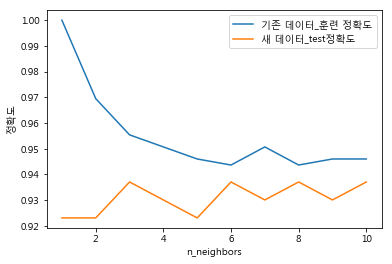

In [131]:
fig

#### 그럼 k=3 으로 다시
0.9736842105263158

In [132]:
knn= KNeighborsClassifier(n_neighbors= 3)

In [133]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [134]:
knn.score(X_test, y_test)

0.9370629370629371

##### 기존 k=1 일때 점수
0.9230769230769231

#### k=5 으로 함더
0.9736842105263158
> k=3 일때와 같다

In [135]:
knn= KNeighborsClassifier(n_neighbors= 5)

In [136]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [137]:
knn.score(X_test, y_test)

0.9230769230769231

# KNeighbors Regressor

In [138]:
from sklearn.neighbors import KNeighborsRegressor
import mglearn

#### ex. wave 데이터

In [139]:
X,y= mglearn.datasets.make_wave(n_samples= 40)

In [140]:
X.shape

(40, 1)

In [141]:
y.shape

(40,)

In [142]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 0)

In [143]:
print(X_train.shape, y_train.shape)

(30, 1) (30,)


In [144]:
print(X_test.shape, y_test.shape)

(10, 1) (10,)


#### 일단 이웃의 수= 3
train 30짜리 조각으로 모델 만듦

In [145]:
reg= KNeighborsRegressor(n_neighbors= 3)

In [146]:
reg

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [147]:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

#### 만든 모델에 10짜리 조각 데이터 넣어봄
테스트 예측

In [148]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

### .score() : 회귀분석이면 결정계수 반환
1이 100%

#### 점수 몇?

In [149]:
reg.score(X_test, y_test)

0.8344172446249604

In [150]:
'{:.4f}'.format(reg.score(X_test, y_test))

'0.8344'

### k값을 여럿 넣어보자
이웃 ~k

In [151]:
fig.clear('all')
fig, axis= plt.subplots(1,3, figsize= (15,4))
plt.rc('font', family= 'Malgun Gothic')
fig.set_size_inches(15,5)

In [152]:
# -3 ~3 에 1000개의 데이터 포인트 만듦
line= np.linspace(-3, 3, 1000).reshape(-1,1)

In [153]:
for n_neighbors, ax in zip([1,3,6], axis):
    # k= 1,3,5,7,9
    reg= KNeighborsRegressor(n_neighbors= n_neighbors)
    reg.fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c= mglearn.cm2(0), markersize= 8)
    ax.plot(X_test, y_test, 'v', c= mglearn.cm2(1), markersize= 8)
    
    ax.set_title(
        "k={}의 train score: {:.3f}, test score: {:.3f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)
        )
    )
    ax.set_xlabel('특성')
    ax.set_ylabel('타깃')
axis[0].legend(['모델예측','train data/target','test data/target'], loc='best')

In [154]:
# 따로 ax[몇] 써줄 필요가 없다
for n_neighbors, ax in zip([1,3,6], axis):
    print(ax)

AxesSubplot(0.125,0.125;0.227941x0.755)
AxesSubplot(0.398529,0.125;0.227941x0.755)
AxesSubplot(0.672059,0.125;0.227941x0.755)


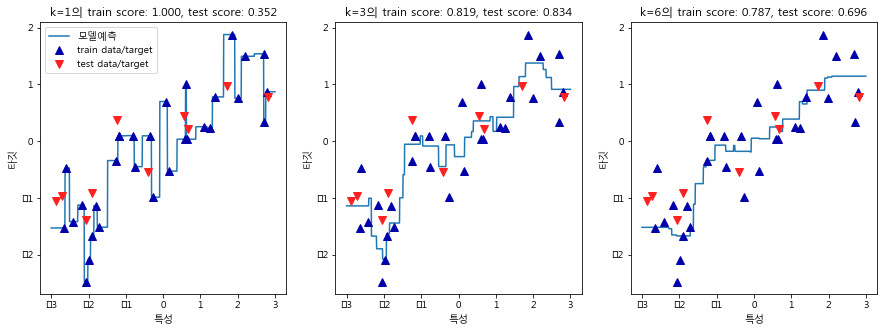

In [155]:
fig

### k(이웃)값이 작거나 클 때 그래프 변화
1. k=1: 예측값 line이 각 데이터 포인트를 모두 지나간다> score: 1.0 > 대신 test는 잘 안 맞음
2. k=3: line이 얼추 지나간다> score: 0.819> test도 얼추 맞음
3. k=6: line이 대략 가운데 지나간다> score: 0.787> test도 얼추

### k=3 이 무난 하구나

## 보스턴 주택가격 데이터 셋

#### 설명변수가 40개가 넘기에, 일부만 떼서 봐야한다!

In [2]:
from sklearn.datasets import load_boston
import mglearn

In [49]:
whos

Variable              Type                   Data/Info
------------------------------------------------------
KNeighborsRegressor   ABCMeta                <class 'sklearn.neighbors<...>ion.KNeighborsRegressor'>
X_test                ndarray                127x104: 13208 elems, type `float64`, 105664 bytes (103.1875 kb)
X_train               ndarray                379x104: 39416 elems, type `float64`, 315328 bytes (307.9375 kb)
ax                    AxesSubplot            AxesSubplot(0.672059,0.125;0.227941x0.755)
axis                  ndarray                3: 3 elems, type `object`, 24 bytes
boston                Bunch                  {'data': array([[6.3200e-<...>/ml/datasets/Housing)\n"}
fig                   Figure                 Figure(1080x288)
line                  ndarray                1000x1: 1000 elems, type `float64`, 8000 bytes
load_boston           function               <function load_boston at 0x000000001137FC80>
mglearn               module                 <module 'm

In [50]:
boston= load_boston()
boston

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [51]:
whos

Variable              Type                   Data/Info
------------------------------------------------------
KNeighborsRegressor   ABCMeta                <class 'sklearn.neighbors<...>ion.KNeighborsRegressor'>
X_test                ndarray                127x104: 13208 elems, type `float64`, 105664 bytes (103.1875 kb)
X_train               ndarray                379x104: 39416 elems, type `float64`, 315328 bytes (307.9375 kb)
ax                    AxesSubplot            AxesSubplot(0.672059,0.125;0.227941x0.755)
axis                  ndarray                3: 3 elems, type `object`, 24 bytes
boston                Bunch                  {'data': array([[6.3200e-<...>/ml/datasets/Housing)\n"}
fig                   Figure                 Figure(1080x288)
line                  ndarray                1000x1: 1000 elems, type `float64`, 8000 bytes
load_boston           function               <function load_boston at 0x000000001137FC80>
mglearn               module                 <module 'm

In [4]:
boston.data.shape

(506, 13)

#### 늘어났다??
각 특성끼리 곱> 상호작용 표현> 새로운 특성으로 확장된 데이터 셋

In [56]:
mglearn.datasets.load_extended_boston()

(array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
         1.00000000e+00, 8.96799117e-02, 8.04248656e-03],
        [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
         1.00000000e+00, 2.04470199e-01, 4.18080621e-02],
        [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
         9.79579831e-01, 6.28144504e-02, 4.02790570e-03],
        ...,
        [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
         1.00000000e+00, 1.07891832e-01, 1.16406475e-02],
        [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
         9.82676920e-01, 1.29930407e-01, 1.71795127e-02],
        [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
         1.00000000e+00, 1.69701987e-01, 2.87987643e-02]]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7,

In [5]:
X, y= mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

In [6]:
y.shape

(506,)

### ....extended 했더니 그래프가 똥망이더라
안 늘리고 그냥하려면??
X= ...data, y= ...target

In [75]:
mglearn.datasets.load_boston().data.shape

(506, 13)

In [74]:
mglearn.datasets.load_boston().target.shape

(506,)

In [76]:
X= mglearn.datasets.load_boston().data
y= mglearn.datasets.load_boston().target

#### y가 연속적이고 범주형인걸 할 예정이니 Regressor
이걸 아는 방법??

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 33)

In [78]:
print(X_train.shape, y_train.shape)

(379, 13) (379,)


In [79]:
print(X_test.shape, y_test.shape)

(127, 13) (127,)


In [80]:
379+127

506

##### 기존걸로 모델만들기

In [37]:
# metric='minkowski', p=2
regBo= KNeighborsRegressor(n_neighbors=2)

regBo.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

#### 별의미는 없지만 값을 보자

In [38]:
regBo.predict(X_test)

array([19.55, 11.65, 15.85, 16.25, 19.65, 21.95, 33.15, 13.5 , 24.75,
       19.55, 30.05, 33.3 ,  7.95, 22.05, 16.75, 24.8 , 13.6 , 15.85,
       25.55, 22.2 , 13.8 , 15.45, 16.65, 22.4 , 28.55, 17.5 , 26.7 ,
       21.75, 13.6 , 30.9 , 21.65, 23.4 ,  8.7 , 19.15, 26.25, 28.2 ,
       25.65,  8.7 , 15.85, 26.25, 11.8 ,  9.5 , 22.  , 16.85, 21.75,
       19.75, 16.15, 18.8 , 27.2 , 20.65, 15.1 , 32.45, 13.55, 11.5 ,
       21.7 , 19.15, 24.6 , 12.35, 22.2 , 21.25, 23.15, 16.25, 41.6 ,
       21.25, 13.6 , 30.  , 22.  ,  8.8 , 17.9 , 36.7 , 19.1 , 21.4 ,
       13.8 , 23.95, 18.1 , 50.  , 14.6 , 11.05, 18.55, 24.7 , 23.75,
       15.1 , 10.55, 20.75, 21.2 , 20.9 , 38.5 , 18.15, 33.15, 37.15,
       27.9 , 18.4 , 21.05, 11.55, 13.05, 33.55, 20.3 , 23.8 , 19.45,
       21.4 , 16.7 , 19.05, 38.05, 21.  ,  7.95, 13.55, 12.7 , 25.5 ,
        9.5 , 22.8 , 18.  ,  9.9 , 13.55, 27.2 , 30.  , 20.55, 21.  ,
       23.35, 29.35, 20.8 , 22.3 , 13.6 , 12.55, 23.  , 21.25, 14.7 ,
       33.15])

##### 기존모델이랑 새거랑 뭐가 나은지 평가

In [39]:
regBo.score(X_test, y_test)

0.6164444015854176

### 다른 k값을 보자

In [81]:
# import mglearn
# import matplotlib.pyplot as plt
# import numpy as np

# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import train_test_split

# X= mglearn.datasets.load_boston().data
# y= mglearn.datasets.load_boston().target
# print(X.shape, y.shape)

# X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 33)

In [18]:
# print(np.linspace(-3,3,5)) # 3 포함
# [i for i in range(1,9,2)] # 9 미포함

In [20]:
# line.shape

In [33]:
# np.linspace(-3,3,1000).reshape(-1,1).shape

(1000, 1)

In [34]:
X_train.shape

(379, 104)

### 에러 났던 이유 
현수> linspace(-3,3,1000) 범위가 요 데이터 범위보다 작아서. 근데 처리방법을 모름

In [83]:
fig, axis= plt.subplots(1,3, figsize= (15,4))
# -3~ 3 3천 조각. [-3,3]
line= np.linspace(-3,3,100).reshape(-1,1)

#ax 가 axis안에 값을 하나씩 꺼내오는거라, 별로 값지정이 필요없음
for n_neighbors, ax in zip([1,3,5], axis):
    #print(n_neighbors, ax)
    regBo= KNeighborsRegressor(n_neighbors= n_neighbors)
    regBo.fit(X_train, y_train)
    
    #검색어 데이터 측정 기준은 교육 데이터 측정 기준과 일치해야합니다.
    #ValueError: query data dimension must match training data dimension
#     ax.plot(line, regBo.predict(line)) 
    
    ax.plot(X_train, y_train, '^', c= mglearn.cm2(0), markersize= 8)
    ax.plot(X_test, y_test, 'v', c= mglearn.cm2(1), markersize= 8)
    
    

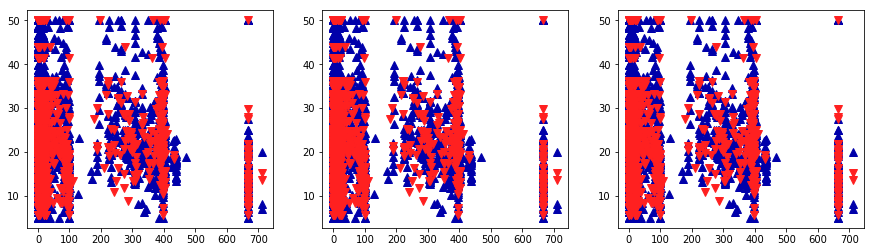

In [84]:
fig

그림이 이따구인 이유: X,y 에 extend해서.
- 근데 extend안하면 X,y로 쪼갤방법을 모르겠

In [91]:
training_accuracy=[]
test_accuracy=[]
neighbors_settings= range(1,11)

for n_neighbors in neighbors_settings:
    knn= KNeighborsRegressor(n_neighbors= n_neighbors)
    knn.fit(X_train, y_train)
    #훈련세트 정확도
    training_accuracy.append(knn.score(X_train, y_train))
    #새로온것- 일반화 정확도
    test_accuracy.append(knn.score(X_test, y_test))

In [95]:
%matplotlib inline
plt.rc('font', family='Malgun Gothic')

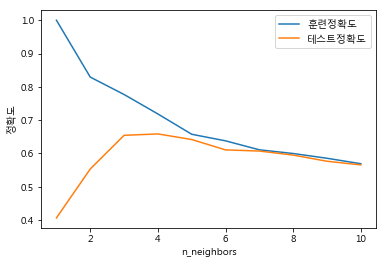

In [96]:
plt.plot(neighbors_settings, training_accuracy, label='훈련정확도')
plt.plot(neighbors_settings, test_accuracy, label='테스트정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()

강사님> 나온 결과로는, k=7 이상이 적당한데
#### 어쨋든 설명력이 너무 낮아서(과소적합) 이 데이터는 K-NN으로 돌리기에는 별로 겠더라더라
선형회귀를 돌려보자>>